<a href="https://colab.research.google.com/github/Kot71nsk/Parkinson/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%96_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выходные данные были обрезаны до нескольких последних строк (5000).
[5001]	validation_0-logloss:0.01937	validation_1-logloss:0.03582
[5002]	validation_0-logloss:0.01937	validation_1-logloss:0.03581
[5003]	validation_0-logloss:0.01937	validation_1-logloss:0.03580
[5004]	validation_0-logloss:0.01936	validation_1-logloss:0.03581
[5005]	validation_0-logloss:0.01936	validation_1-logloss:0.03582
[5006]	validation_0-logloss:0.01936	validation_1-logloss:0.03581
[5007]	validation_0-logloss:0.01936	validation_1-logloss:0.03581
[5008]	validation_0-logloss:0.01936	validation_1-logloss:0.03581
[5009]	validation_0-logloss:0.01936	validation_1-logloss:0.03579
[5010]	validation_0-logloss:0.01936	validation_1-logloss:0.03580
[5011]	validation_0-logloss:0.01935	validation_1-logloss:0.03579
[5012]	validation_0-logloss:0.01935	validation_1-logloss:0.03580
[5013]	validation_0-logloss:0.01935	validation_1-logloss:0.03578
[5014]	validation_0-logloss:0.01935	validation_1-logloss:0.03578
[5015]	validation_0-lo

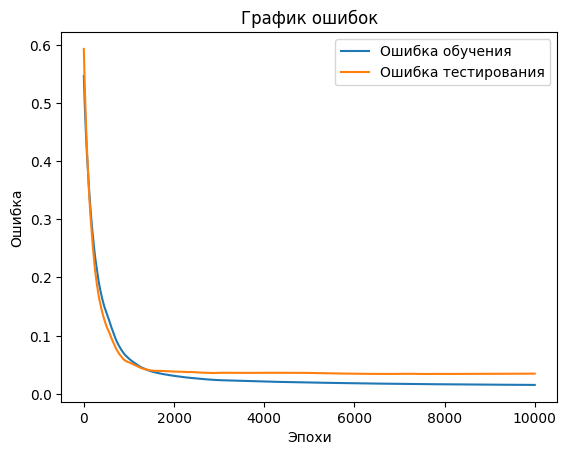

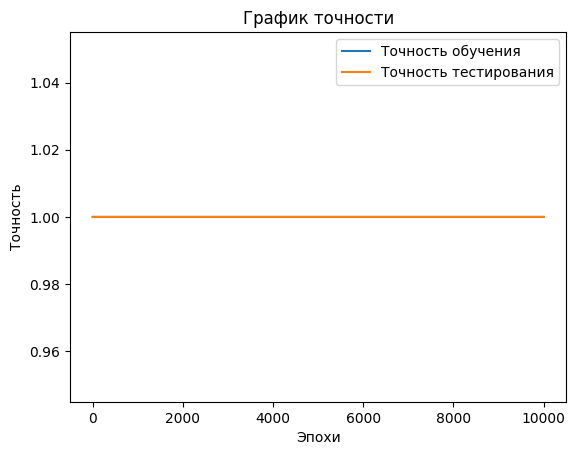

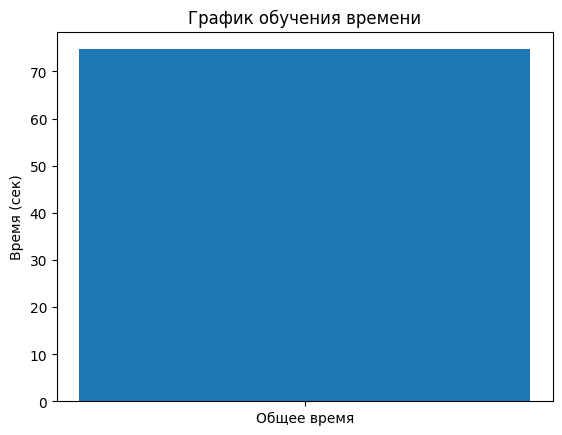

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import sys
import os
import time
!wget https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data

# Загрузка данных
df = pd.read_csv('parkinsons.data', na_values='?', engine='python')

# Удаление ненужного столбца
df = df.drop('name', axis=1)

# Обработка пропущенных значений
df = df.replace('?', np.nan)
numerical_cols = df.select_dtypes(include=np.number).columns

if len(numerical_cols) > 0:  # Проверка, что есть числовые колонки для обработки
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
else:
    print("Ошибка: В данных нет числовых столбцов для обработки.")
    exit()

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('status', axis=1)
y = df['status']

# Преобразование в NumPy массивы
X = X.values
y = y.values

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Создание и обучение модели XGBoost
model = XGBClassifier(learning_rate =0.005, max_depth = 3, n_estimators = 10000
                      ) #eval_metric='logloss', verbose=False

eval_set = [(X_train, y_train), (X_test, y_test)]
start_time = time.time()
model.fit(X_train, y_train, eval_set=eval_set)
end_time = time.time()
# model.fit(X_train, y_train, eval_set=eval_set)


# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

# # Вывод графика ошибок
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Ошибка обучения')
ax.plot(x_axis, results['validation_1']['logloss'], label='Ошибка тестирования')
ax.legend()
plt.ylabel('Ошибка')
plt.xlabel('Эпохи')
plt.title('График ошибок')
plt.show()

# Вывод графика точности
train_accuracy = [accuracy_score(y_train, model.predict(X_train)) for _ in range(epochs)]
test_accuracy = [accuracy_score(y_test, model.predict(X_test)) for _ in range(epochs)]
fig, ax = plt.subplots()
ax.plot(x_axis, train_accuracy, label='Точность обучения')
ax.plot(x_axis, test_accuracy, label='Точность тестирования')
ax.legend()
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.title('График точности')
plt.show()

# Вывод графика обучения времени модели
training_time = end_time - start_time  # В секундах
fig, ax = plt.subplots()
ax.bar(['Общее время'], [training_time])
plt.ylabel('Время (сек)')
plt.title('График обучения времени')
plt.show()